# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [9]:
import pandas as pd

df = pd.read_csv('C:/Users/jwhoj/Desktop/EDA_human_temperature/data/human_body_temperature.csv')

In [10]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


# 1.) Is the distribution of body temperatures normal?

    Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test 

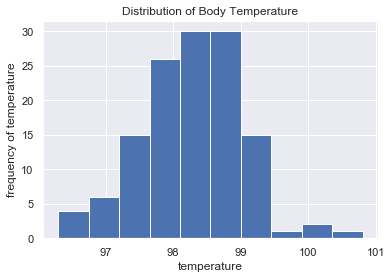

The histogram above shows that there is a resemblance of a normal distribution. However, the bulk of the bins are moving away from the left. Therefore this seems to be a left-skewed distribution.


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
_ = plt.hist(df['temperature'])
_ = plt.xlabel('temperature')
_ = plt.ylabel('frequency of temperature')
_ = plt.title('Distribution of Body Temperature')
plt.show()
print('The histogram above shows that there is a resemblance of a normal distribution. However, the bulk of the bins are moving away from the left. Therefore this seems to be a left-skewed distribution.')

In [12]:
import numpy as np

# Computing the ECDF
def ecdf(df):
    """Compute ECDF for a one-dimensional array of measurements"""

    # Number of data points: n 
    n = len(df)

    # x-data for the ECDF: x
    x = np.sort(df)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n 

    return x,y 

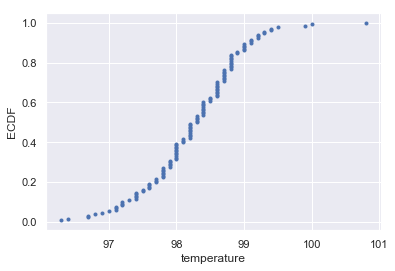

The ECDF shows a normal distribution curve


In [13]:
# Plotting the ECDF

# Compute ECDF for temperature data: x_temp, y_temp
x_temp, y_temp = ecdf(df['temperature'])

# Generate plot 
plt.plot(x_temp, y_temp, marker='.', linestyle='none')

# Label the axes 
_ = plt.xlabel('temperature')
_ = plt.ylabel('ECDF')
    
# Display the plot 
plt.show()
print('The ECDF shows a normal distribution curve')

# 2.) Is the sample size large? Are the observations independent?

    Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply. 

In [14]:
df.count()

temperature    130
gender         130
heart_rate     130
dtype: int64

In [15]:
print('The Central Limit Theorem states that for the CLT to hold, the sample size must be sufficiently large (n > 30). The sample size is 130 and therefore is considered large. The observations are indeed independent because one observation of temperature provides no information about the occurrence of another observation of temperature.')

The Central Limit Theorem states that for the CLT to hold, the sample size must be sufficiently large (n > 30). The sample size is 130 and therefore is considered large. The observations are indeed independent because one observation of temperature provides no information about the occurrence of another observation of temperature.


# 3.) Is the true population mean really 98.6 degrees F?

    First, try a bootstrap hypothesis test.
    Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    In this situation, is it appropriate to use the 𝑡 or 𝑧 statistic? Now try using the other test. How is the result be different? Why? 

We would most likely use a one-sample test because we are comparing one set of data to a single number. Whereas with a two-sample test, you compare two sets of data.
It is more appropriate to use t-statistic because we do not know the population standard deviation. 
In all of the tests, the p-value is so small that we must reject the null hypothesis that the true population mean is 98.6 deg F. 
The true population mean is not really 98.6 degrees F. 

In [16]:
# Compute mean and standard deviation: mu, sigma

import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt

mu = np.mean(df['temperature'])
sigma = np.std(df['temperature'])

print('mu is =', mu)
print('sigma is =', sigma)

mu is = 98.24923076923078
sigma is = 0.7303577789050377


In [17]:
temp = np.array(df['temperature'])
print(temp)

[ 99.3  98.4  97.8  99.2  98.   99.2  98.   98.8  98.4  98.6  98.8  96.7
  98.2  98.7  97.8  98.8  98.3  98.2  97.2  99.4  98.3  98.2  98.6  98.4
  97.8  98.   97.8  98.2  98.4  98.1  98.3  97.6  98.5  98.6  99.3  99.5
  99.1  98.3  97.9  96.4  98.4  98.4  96.9  97.2  99.   97.9  97.4  97.4
  97.9  97.1  98.9  98.3  98.5  98.6  98.2  98.6  98.8  98.2  98.2  97.6
  99.1  98.4  98.2  98.6  98.7  97.4  97.4  98.6  98.7  98.9  98.1  97.7
  98.   98.8  99.   98.8  98.   98.4  97.4  97.6  98.8  98.   97.5  99.2
  98.6  97.1  98.6  98.   98.7  98.1  97.8 100.   98.8  97.1  97.8  96.8
  99.9  98.7  98.8  98.   99.   98.5  98.   99.4  97.6  96.7  97.   98.6
  98.7  97.3  98.8  98.   98.2  99.1  99.   98.  100.8  97.8  98.7  98.4
  97.7  97.9  99.   97.2  97.5  96.3  97.7  98.2  97.9  98.7]


In [18]:
# Bootstrap hypothesis test 
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

def diff_from_popmean(data, popmean = 98.6):
    return np.mean(data) - popmean

In [21]:
# Make an array of translated temp: translated_temp
translated_temp = temp - np.mean(temp) + 98.6

diff_obs = diff_from_popmean(temp)

# Take bootstrap replicates of Frog B's translated impact forces: bs_replicates
bs_replicates = draw_bs_reps(translated_temp, diff_from_popmean, 10000)

# Compute fraction of replicates that are less than the observed Frog B force: p
p = np.sum(bs_replicates <= diff_obs) / 10000

# Print the p-value
print('p = ', p)


p =  0.0


In [25]:
# First way to calculate t-test with p-value
stats.ttest_1samp(temp, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

In [24]:
# Second way to calculate the t-score by using the formula t=(x̄-μ)/(s/sqrt(n))

t = ((np.mean(temp))-98.6)/(np.std(temp)/np.sqrt(len(temp)))
print ('t-statistic is', t )

t-statistic is -5.4759252020785585


In [30]:
# Calculate the z statistic 
from statsmodels.stats.weightstats import ztest
z = ztest(temp,value=98.6)
print('z-statistic is', z)

z-statistic is (-5.4548232923645195, 4.9021570141012155e-08)


Z test: p-value is 4.9021570141012155e-08
T test: p-value is 2.4106320415561276e-07 
Bootstrap test: p-value is 0.0 
In all 3 tests, the p-values were below alpha value 0.05 so we reject the null hypothesis that the true population mean is really 98.6 degrees

# 4.) Draw a small sample of size 10 from the data and repeat both frequentist tests.
Which one is the correct one to use?
What do you notice? What does this tell you about the difference in application of the 𝑡 and 𝑧 statistic? 

We should use the t-test because the sample size is 10 (n < 30). 
We generally use z-tests when we have a large sample size (n > 30), 
when we know the standard deviation, when samples are drawn at random,
and when the samples are taken from an independent population. 
Alpha level: 0.05

In [33]:
sample = np.random.choice(temp, size=10)
sample

array([ 98.6,  98.3,  97.4,  98.2,  98.5,  97.6,  98.6,  99. , 100.8,
        99.1])

In [34]:
stats.ttest_1samp(sample, 98.6)

Ttest_1sampResult(statistic=0.03364844556653113, pvalue=0.9738919309682937)

In [35]:
# Calculate the t-score by using the formula t=(x̄-μ)/(s/sqrt(n))
t = ((np.mean(sample))-98.6)/(np.std(sample)/np.sqrt(len(sample)))
print ('t-statistic is', t )

t-statistic is 0.03546857590481104


In [36]:
# Calculate the z statistic 
from statsmodels.stats.weightstats import ztest
z = ztest(sample,value=98.6)
print('z-statistic is', z)

z-statistic is (0.03364844556653113, 0.9731574901446447)


Z test: p-value is 0.9731574901446447
T test: p-value is 0.9738919309682937 
In both tests, the p-values are above alpha value 0.05 so we accept the null hypothesis. 
It suggests the sample size of 10 mean does not differ significantly from the population mean. 

# 5.) At what temperature should we consider someone's temperature to be "abnormal"?
    As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws. 

In [83]:
# Bootstrap approach
bs_sample = np.empty(10000)
for i in range(10000):
    bs_sample[i] = np.mean(np.random.choice(temp, size=len(temp)))

In [85]:
# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_sample, [2.5, 97.5])
print('The 95% confidence interval is', conf_int)

The 95% confidence interval is [98.12459615 98.37232692]


In [87]:
# Frequentist approach
# Calculate the margin of error
me = np.abs(1.96 * np.std(temp)/np.sqrt(len(temp)) )
print('The margin of error is', me)
print('The 95% confidence interval is [', np.mean(temp)-me, np.mean(temp)+me, ']')

The margin of error is 0.125550964802579
The 95% confidence interval is [ 98.12367980442819 98.37478173403336 ]


# 6.) Is there a significant difference between males and females in normal temperature?
What testing approach did you use and why?
Write a story with your conclusion in the context of the original problem. 

In [88]:
# Make two arrays 
male = np.array(df[df['gender'] == 'M']['temperature'])
female = np.array(df[df['gender'] == 'F']['temperature'])

In [89]:
# Average gender temperature 
print('The average male body temperature in this sample is', np.mean(male))
print('The average female body temperature in this sample is',np.mean(female))

The average male body temperature in this sample is 98.10461538461537
The average female body temperature in this sample is 98.39384615384614


In [96]:
# Bootstrap resampling method

# Generate shifted/translated arrays
male_translated = male - np.mean(male) + (np.mean(temp))
female_translated = female - np.mean(female) + (np.mean(temp))

# Compute 1,000 bootstrap replicates from shifted arrays
bs_mean_m = np.empty(1000)
bs_mean_f = np.empty(1000)
for i in range(1000): 
    bs_sample_m = np.random.choice(male_translated, size=len(male))
    bs_sample_f = np.random.choice(female_translated, size=len(female))
    bs_mean_m[i] = np.mean(bs_sample_m)
    bs_mean_f[i] = np.mean(bs_sample_f)

# Get replicates of difference of means: bs_replicates
bs_diff = bs_mean_f - bs_mean_m

# Compute and print p-value: p
p = np.sum(bs_diff>(np.mean(female)-np.mean(male)))/ len(bs_diff)
print('p-value =', p)

p-value = 0.009


The null hypothesis is that there is no significant difference between males and females in normal temperature. 
Here we used a bootstrap resampling method. 
The p-value returned is smaller than 0.05 which suggests that we reject the null hypothesis and that there is significant difference between male and female normal temperature.